# Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data

- N - ratio of Nitrogen content in soil
- P - ratio of Phosphorus content in soil
- K - ratio of Potassium content in soil
- temperature - temperature in degree Celsius
- humidity - relative humidity in %
- ph - ph value of the soil
- rainfall - rainfall in mm
- crop - Suitable crop to grow (target variable)

In [2]:
train_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/crop_recommendation/train_set_label.csv")
train_data


N           P          K  temperature   humidity        ph  \
0      17.000000  136.000000  196.00000    23.871923  90.499390  5.882156   
1      49.000000   69.000000   82.00000    18.315615  15.361435  7.263119   
2      74.000000   49.000000   38.00000    23.314104  71.450905  7.488014   
3     104.000000   35.000000   28.00000    27.510061  50.666872  6.983732   
4      23.000000   72.000000   84.00000    19.020613  17.131591  6.920251   
...          ...         ...        ...          ...        ...       ...   
1645   40.000000   17.000000   15.00000    21.350934  90.949297  7.871063   
1646   40.000000   18.000000   43.00000    19.386038  86.790585  5.767373   
1647   35.000000  135.000000  199.00000    21.774667  80.549426  6.400720   
1648   97.000000   35.000000   26.00000    24.914610  53.741447  6.334610   
1649   19.665506   53.221835   21.55633    28.018740  81.158238  6.816712   

        rainfall         crop  
0     103.054809        apple  
1      81.787105     chickpea  
2     164.497037         jute  
3     143.995555       coffee  
4      79.926981     chickpea  
...          ...          ...  
1645  107.086209       orange  
1646  109.913098  pomegranate  
1647   69.396304       grapes  
1648  166.254931       coffee  
1649   42.427374     mungbean  

[1650 rows x 8 columns]

In [3]:
train_data.describe()

N            P            K  temperature     humidity  \
count  1650.000000  1650.000000  1650.000000  1650.000000  1650.000000   
mean     50.370308    53.419241    48.111081    25.647214    71.563115   
std      36.743966    33.320501    50.537044     5.005005    22.198130   
min       0.000000     5.000000     5.000000     9.467960    14.273280   
25%      21.000000    27.000000    20.552276    22.807269    60.120113   
50%      37.000000    52.000000    31.575398    25.656980    80.547206   
75%      84.738202    68.000000    49.000000    28.529953    90.003702   
max     136.000000   145.000000   205.000000    42.936054    99.981876   

                ph     rainfall  
count  1650.000000  1650.000000  
mean      6.485583   103.965778  
std       0.765865    55.510324  
min       3.525366    20.360011  
25%       5.986160    65.025621  
50%       6.426118    95.246217  
75%       6.924943   127.887636  
max       9.935091   298.560117

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1650 non-null   float64
 1   P            1650 non-null   float64
 2   K            1650 non-null   float64
 3   temperature  1650 non-null   float64
 4   humidity     1650 non-null   float64
 5   ph           1650 non-null   float64
 6   rainfall     1650 non-null   float64
 7   crop         1650 non-null   object 
dtypes: float64(7), object(1)
memory usage: 103.2+ KB


In [7]:
len(train_data.crop.unique())

22

In [10]:
train_data.crop.value_counts()

chickpea       75
rice           75
jute           75
coconut        75
maize          75
blackgram      75
kidneybeans    75
grapes         75
coffee         75
mungbean       75
banana         75
muskmelon      75
apple          75
cotton         75
orange         75
pigeonpeas     75
mango          75
papaya         75
lentil         75
watermelon     75
mothbeans      75
pomegranate    75
Name: crop, dtype: int64

Los datos de entrenamiento están balanceados

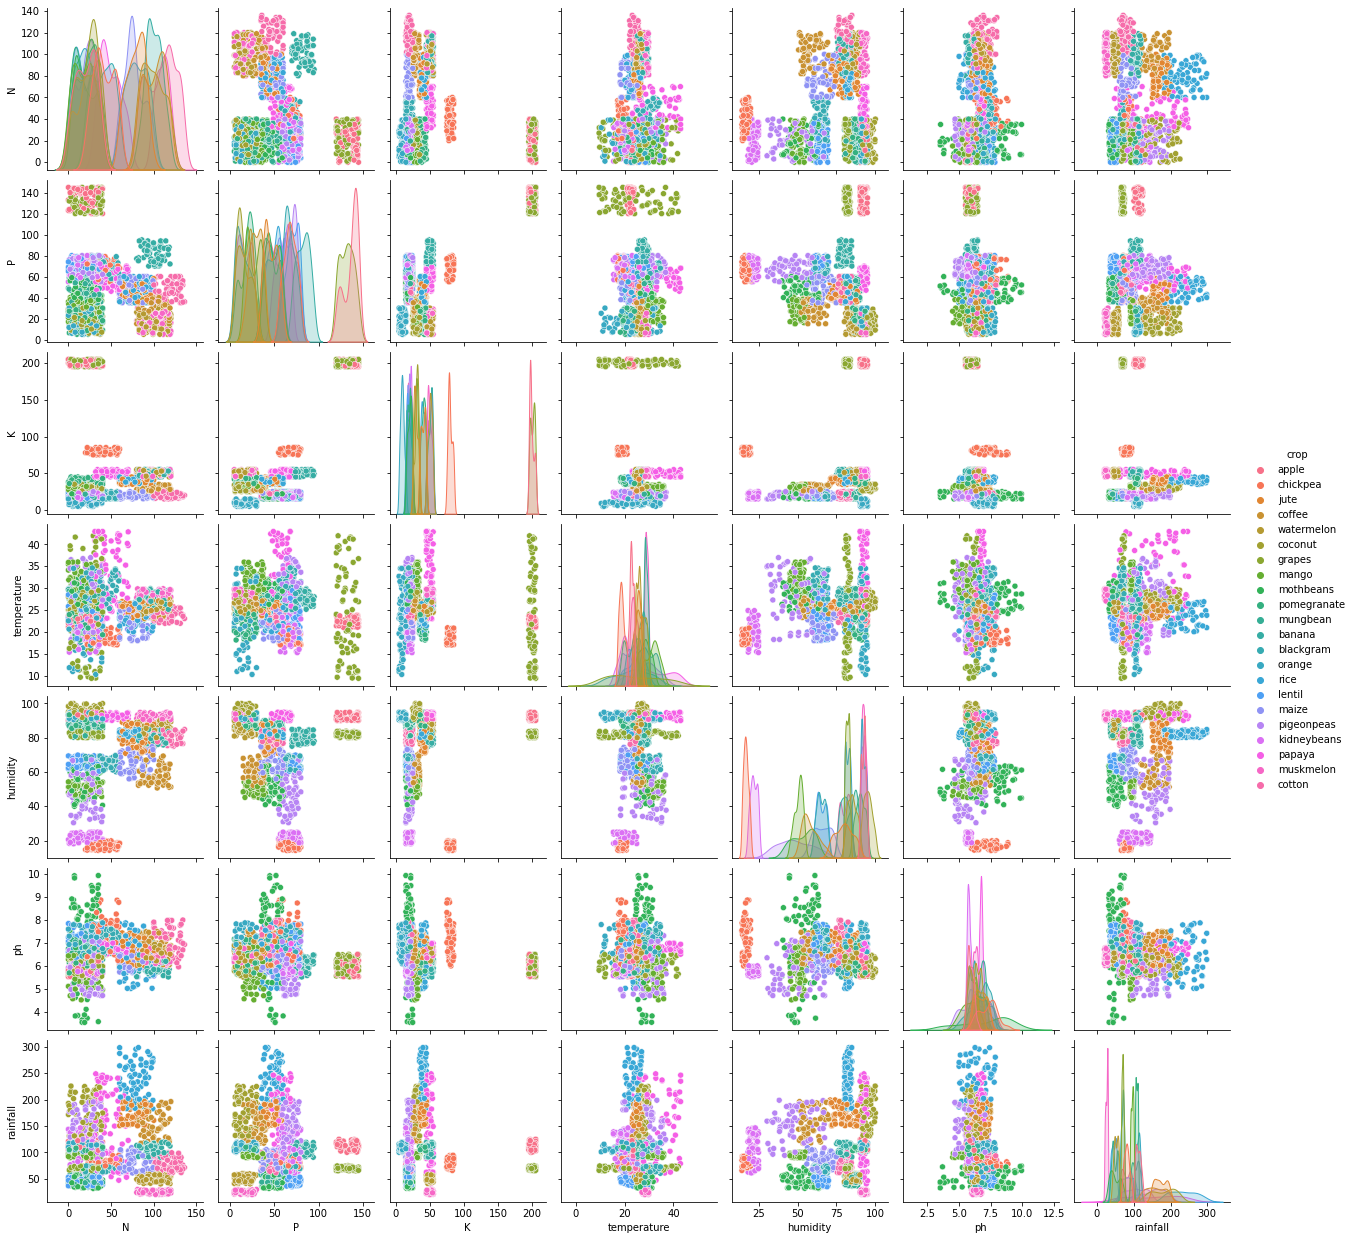

In [11]:
sns.pairplot(train_data, hue = 'crop')

Pareciera que forman grupos, por lo que quiza un método basado en árboles podría funcionar bien.

<AxesSubplot:>

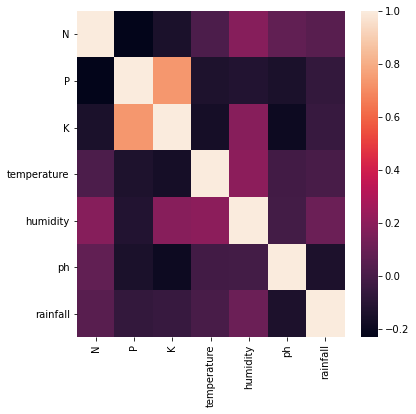

In [12]:
plt.figure(figsize = (6,6))
sns.heatmap(train_data.corr())

Sólo P con K tienen una correlación considerable.

In [13]:
crop_types = train_data.crop.unique()
crop_types

array(['apple', 'chickpea', 'jute', 'coffee', 'watermelon', 'coconut',
       'grapes', 'mango', 'mothbeans', 'pomegranate', 'mungbean',
       'banana', 'blackgram', 'orange', 'rice', 'lentil', 'maize',
       'pigeonpeas', 'kidneybeans', 'papaya', 'muskmelon', 'cotton'],
      dtype=object)

In [14]:
group_data = train_data.groupby('crop')[["N","P","K"]].mean().reset_index()
group_data

crop           N           P           K
0         apple   20.259232  136.371209  199.065755
1        banana   99.953432   82.250403   50.738844
2     blackgram   39.991351   66.891254   19.294515
3      chickpea   41.265024   67.665927   79.659389
4       coconut   22.691101   15.406438   30.749575
5        coffee  100.622258   29.093257   29.529856
6        cotton  116.805443   47.160798   19.509984
7        grapes   22.465363  131.764473  200.168911
8          jute   78.602265   46.296794   40.033628
9   kidneybeans   21.503453   67.571275   20.378959
10       lentil   18.476146   70.097481   19.212062
11        maize   76.818645   48.686448   19.684530
12        mango   18.385008   26.834478   29.814937
13    mothbeans   20.680445   48.123961   20.326928
14     mungbean   21.116042   46.907211   20.030270
15    muskmelon  101.321814   16.278092   49.608840
16       orange   19.354004   15.468607    9.578759
17       papaya   48.998475   59.294386   50.051972
18   pigeonpeas   21.221183   68.460302   20.491426
19  pomegranate   18.944160   19.549802   40.347224
20         rice   79.706667   48.360000   39.946667
21   watermelon   98.965260   16.690709   50.220762

Necesito Acomodarlo para poder graficar, para eso necesito transformar las columnas en filas (para dejarlo en una forma en el que la libreria para graficar esté cómoda), para eso uso la funcion melt.

In [15]:
group_df_plot = group_data.melt(id_vars=["crop"], # Variable(s) que fijo, las otras serán transformadas en columnas
        var_name="Element",  # Nombre que quiero ponerle a la columna formada por todas las columnas que ahora serán filas
        value_name="Value") # Nombre que quiero ponerle a la columna donde estarán los valores
group_df_plot

crop Element      Value
0         apple       N  20.259232
1        banana       N  99.953432
2     blackgram       N  39.991351
3      chickpea       N  41.265024
4       coconut       N  22.691101
..          ...     ...        ...
61       papaya       K  50.051972
62   pigeonpeas       K  20.491426
63  pomegranate       K  40.347224
64         rice       K  39.946667
65   watermelon       K  50.220762

[66 rows x 3 columns]

In [16]:
import plotly.express as px

fig = px.bar(group_df_plot, x="Element", y="Value", color="crop")
fig.show()

Para ver solo la gráfica para un crop, se debe hacer doble click en el.

Con este gráfico se puede ver que elementos dominan según el crop.

## Distplots

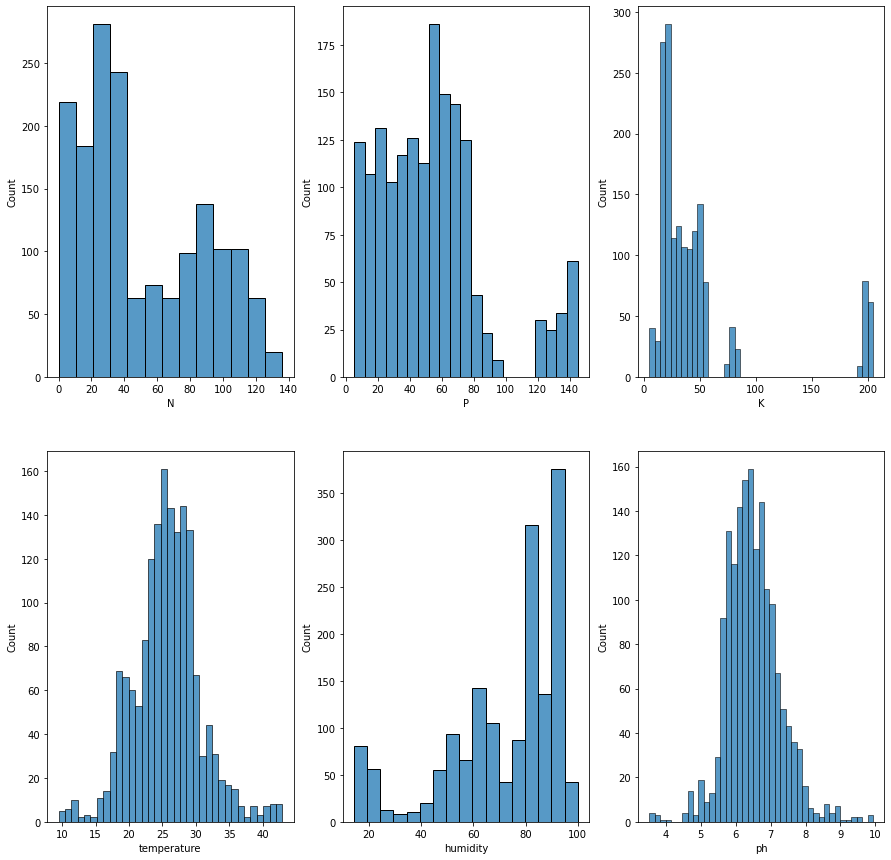

In [56]:
columns = train_data.columns[:-1]
fig, ax = plt.subplots(2,3, figsize = (15,15))
for ax,columna in zip(ax.flatten(),columns):
    sns.histplot(data = train_data, x = columna, ax = ax)

## Boxplots
Para detectar outliers

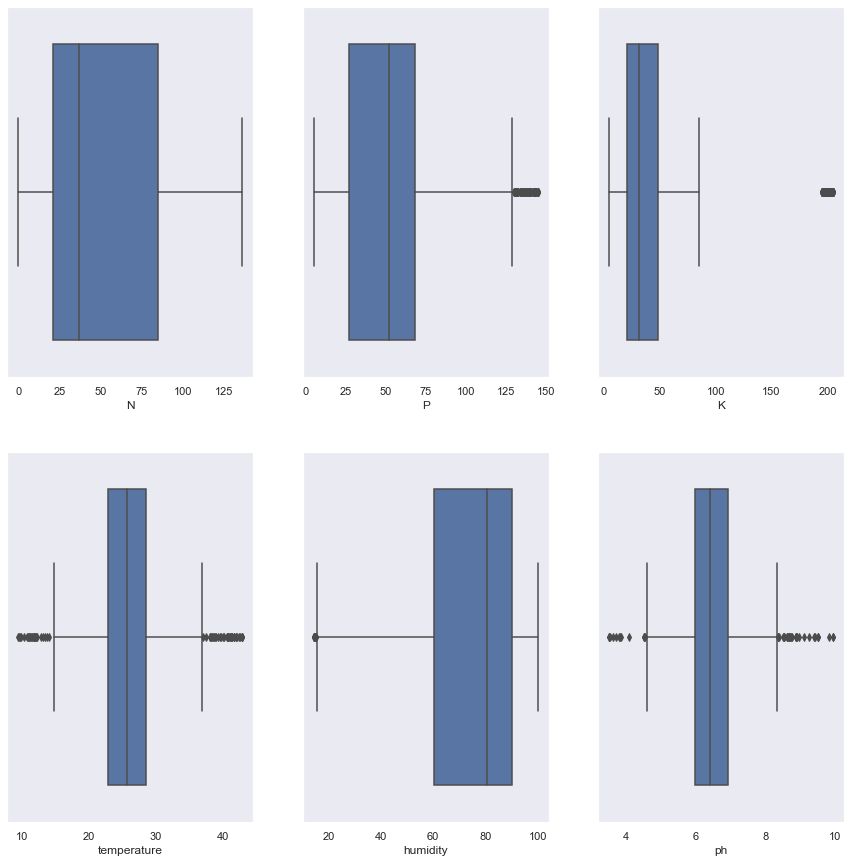

In [61]:
columns = train_data.columns[:-1]
sns.set_theme(style="dark")
fig, ax = plt.subplots(2,3, figsize = (15,15))
for ax,columna in zip(ax.flatten(),columns):
    sns.boxplot(data = train_data, x = columna, ax = ax)

La mayoria de las variables presentan gran cantidad de outliers, por lo que los eliminaré de la forma clásica con el interquartil
# Outliers

In [78]:
def del_out(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    mask =   (Q1 - 1.5*IQR <= df[column]) & (df[column] <= Q3 + 1.5*IQR)
    df = df[mask]
    return df
    

In [79]:
df = train_data.copy()
out_columns = ["P", "K", "temperature", "ph"]
for col in out_columns:
    df = del_out(df,col)

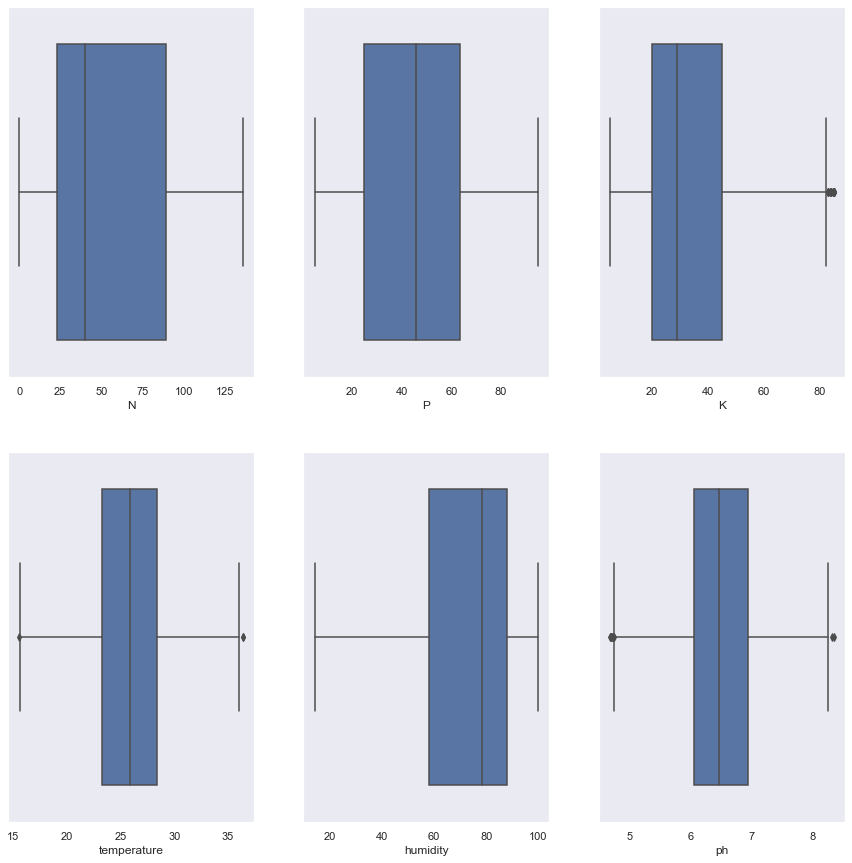

In [81]:
columns = df.columns[:-1]
sns.set_theme(style="dark")
fig, ax = plt.subplots(2,3, figsize = (15,15))
for ax,columna in zip(ax.flatten(),columns):
    sns.boxplot(data = df, x = columna, ax = ax)

In [102]:
print("Se eliminaron %i filas debido a la eliminación de outliers.(%.1f%%)"%(len(train_data) - len(df),(len(train_data) - len(df))/len(train_data)*100 )) 

Se eliminaron 236 filas debido a la eliminación de outliers.(14.3%)


Aun asi se eliminaron muchos datos, por lo que puede traer problemas.

In [103]:
df

N          P         K  temperature   humidity        ph  \
1      49.000000  69.000000  82.00000    18.315615  15.361435  7.263119   
2      74.000000  49.000000  38.00000    23.314104  71.450905  7.488014   
3     104.000000  35.000000  28.00000    27.510061  50.666872  6.983732   
4      23.000000  72.000000  84.00000    19.020613  17.131591  6.920251   
5      83.000000  10.000000  53.00000    24.929948  85.008024  6.195142   
...          ...        ...       ...          ...        ...       ...   
1644   29.000000  78.000000  25.00000    19.959917  59.331578  5.982855   
1645   40.000000  17.000000  15.00000    21.350934  90.949297  7.871063   
1646   40.000000  18.000000  43.00000    19.386038  86.790585  5.767373   
1648   97.000000  35.000000  26.00000    24.914610  53.741447  6.334610   
1649   19.665506  53.221835  21.55633    28.018740  81.158238  6.816712   

        rainfall         crop  
1      81.787105     chickpea  
2     164.497037         jute  
3     143.995555       coffee  
4      79.926981     chickpea  
5      48.758595   watermelon  
...          ...          ...  
1644  195.787103   pigeonpeas  
1645  107.086209       orange  
1646  109.913098  pomegranate  
1648  166.254931       coffee  
1649   42.427374     mungbean  

[1414 rows x 8 columns]

# Test Data

In [11]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/crop_recommendation/test_set_label.csv')
test_data

N           P           K  temperature   humidity        ph  \
0     22.000000   51.000000   16.000000    27.965837  61.349001  8.639586   
1    130.206910   59.206910   18.586179    25.123987  82.356124  6.707583   
2     28.000000   27.000000   34.000000    32.454653  50.696938  6.526654   
3     40.000000   61.000000   22.000000    20.949818  65.810876  7.002216   
4     28.000000   46.000000   16.000000    29.008124  84.960894  6.664188   
..          ...         ...         ...          ...        ...       ...   
545   29.295438   76.852281   76.034033    17.994221  15.830887  7.752104   
546   26.000000   18.000000   27.000000    27.459078  92.907365  5.836075   
547   28.812042   18.937347   30.749389    27.019737  95.473311  5.720116   
548   33.659355  128.893763  204.776559    21.523364  92.819392  6.053499   
549   29.000000   36.000000   25.000000    28.285115  88.439398  7.130279   

       rainfall  
0     70.104721  
1     91.431992  
2     95.048716  
3     44.239130  
4     45.910114  
..          ...  
545   73.869451  
546  142.143000  
547  143.306796  
548  107.950332  
549   48.566902  

[550 rows x 7 columns]

# Modelos de Clasificación
Aunque dije en un comienzo que probablemente los modelos basados en arbol podrian tener buenos resultados, igual intentaremos con algunos otros

In [114]:
from sklearn.model_selection import train_test_split


X = df.iloc[:,:-1]
y = df.crop

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

## Decision Tree

In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

tree_model = DecisionTreeClassifier()

cross_val_score(tree_model, X, y, cv=10)


array([0.97183099, 0.97183099, 0.97183099, 0.99295775, 0.9787234 ,
       0.9929078 , 0.9858156 , 0.9858156 , 0.9858156 , 1.        ])

In [122]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [5,10,15,30],
    'min_samples_leaf': [0.05, 5,10]
    
}
random_tree = GridSearchCV(tree_model, params, scoring = 'accuracy')
random_tree.fit(X, y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15, 30],
                         'min_samples_leaf': [0.05, 5, 10]},
             scoring='accuracy')

In [123]:
random_tree.best_score_, random_tree.best_params_

(0.9745407613462648, {'max_depth': 15, 'min_samples_leaf': 5})

In [130]:
pred = random_tree.predict(test_data)
data_pred = pd.DataFrame(pred, columns = ['prediction'])
data_pred

prediction
0    blackgram
1       cotton
2        mango
3       lentil
4     mungbean
..         ...
545   chickpea
546    coconut
547    coconut
548     papaya
549   mungbean

[550 rows x 1 columns]

In [131]:
data_pred.to_csv('tree_preds.csv')

In [4]:
def submit(preds, name_pred):
    data_pred = pd.DataFrame(preds, columns = ['prediction'])
    data_pred.to_csv('%s.csv'%(name_pred))
    return ('Csv Created!')
    
    

## Random Forest Classifier
No hay resultados muy buenos, por lo que probaré random forest con la data sin eliminar outliers.

In [6]:
X = train_data.iloc[:,:-1]
y = train_data.crop

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf_clf = RandomForestClassifier()

rf_params = {
    'n_estimators' : [10,50,100,500,1000],
    'max_depth' : [None,50,100,300]
    
}

grid_rf = GridSearchCV(rf_clf, rf_params, scoring = 'accuracy', cv = 10)
grid_rf.fit(X, y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 50, 100, 300],
                         'n_estimators': [10, 50, 100, 500, 1000]},
             scoring='accuracy')

In [14]:
grid_rf.best_params_, grid_rf.best_score_

({'max_depth': 300, 'n_estimators': 500}, 0.9957575757575757)

In [145]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, grid_rf.predict(X_test))

0.9952941176470588

In [15]:
rf_pred = grid_rf.predict(test_data)
submit(rf_pred, 'rf_predictions')

'Csv Created!'

*99.82 accuracy DPhi*